<a href="https://colab.research.google.com/github/saks0106/Frequent-Lookouts/blob/main/Removing_Missing_Values_at_Random.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#When entire row/column has missing data is removed, this approach is called Complete Case  Analysis (CCA) or list-wise deletion
Eg - Removing ROWS whhere MCAR < %5

**ASSUMPTION - DO CCA only when a feature has missing values at random (MCAR) ie has no specific pattern like first 50 or last 50 values are missing. In that case, don't do CCA if pattern is noticed. Apply CCA only when MCAR <5%. If missing values in features > 95% then drop that feature**

Advantage:
1. Easy to implement as no data manipulation required
2. Preserves variable distribution if data is MCAR(Missing completely @ random) then the distribution of the variables of the reduced dataset should match the distribution in original dataset

Disadvantage:
1. It can exclude a large fraction  of original dataset if missing data in adundant
2. Excluded observations could be informative for the analysis if data is not MCAR
3. When using model in production, model will not know how to handle missing data ie if missing data/feature is provided to deployed model



In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('data_science_job.csv')

In [4]:
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,NaN,NaN,36.0,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,47.0,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5.0,NaN,NaN,83.0,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,0.0,NaN,Pvt Ltd,52.0,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,20.0,50-99,Funded Startup,8.0,0.0


In [5]:
df.isnull().mean()*100

enrollee_id                0.000000
city                       0.000000
city_development_index     2.358311
gender                    23.022062
relevent_experience        0.000000
enrolled_university        1.987448
education_level            2.367820
major_discipline          14.910612
experience                 0.285280
company_size              31.114492
company_type              31.913275
training_hours             4.326740
target                     0.009509
dtype: float64

In [8]:
df.shape

(10516, 13)

Applying CCA ie removing such dataset where missing data < 5%

In [9]:
cols = [var for var in df.columns if df[var].isnull().mean() < 0.05 and df[var].isnull().mean() > 0]
cols

['city_development_index',
 'enrolled_university',
 'education_level',
 'experience',
 'training_hours',
 'target']

In [10]:
df[cols].sample(5)

,city_development_index,enrolled_university,education_level,experience,training_hours,target
2265,NaN,Full time course,High School,5.0,316.0,1.0
1747,0.910,no_enrollment,High School,2.0,12.0,0.0
6768,0.926,no_enrollment,Masters,16.0,42.0,0.0
10056,0.698,NaN,Phd,20.0,9.0,1.0
2092,0.920,no_enrollment,Graduate,20.0,17.0,0.0


In [12]:
len(df[cols].dropna()) / len(df) #89% data will still be left

0.8954925827310765

In [13]:
new_df = df[cols].dropna()
df.shape, new_df.shape

((10516, 13), (9417, 6))

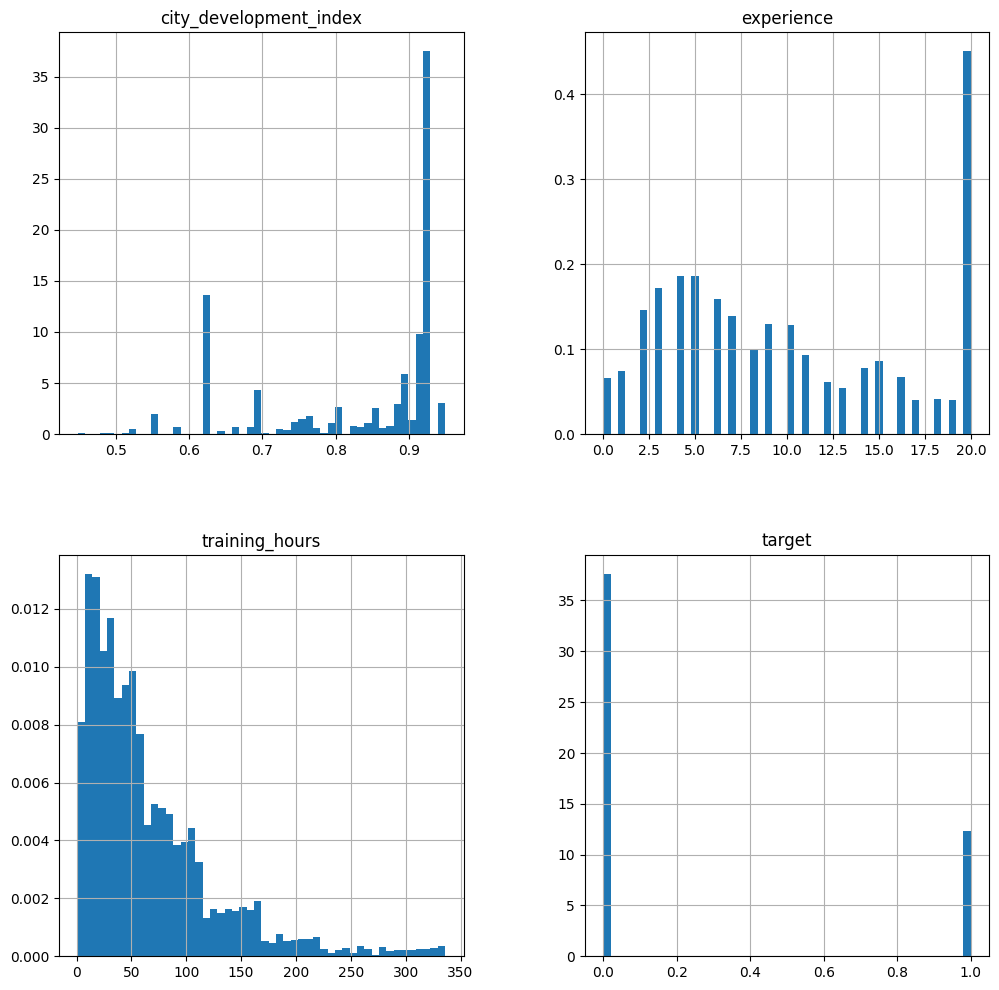

In [14]:
new_df.hist(bins=50, density=True, figsize=(12, 12))
plt.show()

distribution for training_hours is almost same which tells us that data that we dropped was MCAR

<Axes: >

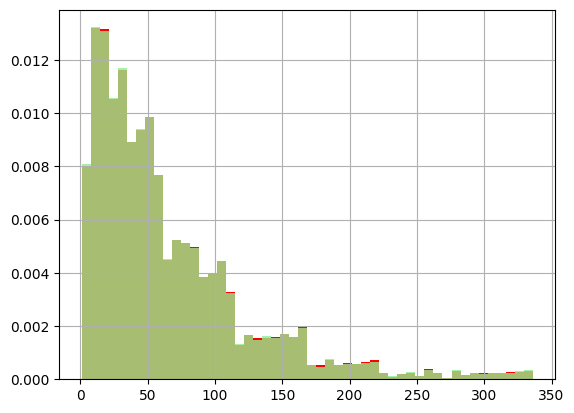

In [15]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original data
df['training_hours'].hist(bins=50, ax=ax, density=True, color='red')

# data after cca, the argument alpha makes the color transparent, so we can
# see the overlay of the 2 distributions
new_df['training_hours'].hist(bins=50, ax=ax, color='lightgreen', density=True, alpha=0.8)

<Axes: ylabel='Density'>

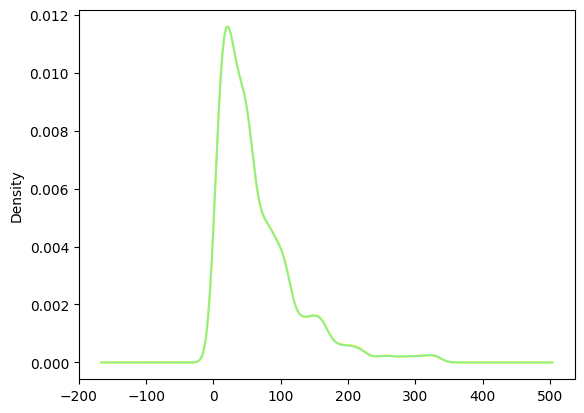

In [17]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original data
df['training_hours'].plot.density(color='yellow')

# data after cca
new_df['training_hours'].plot.density(color='lightgreen')

<Axes: >

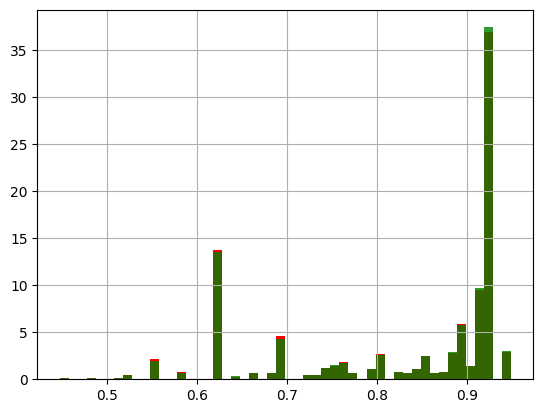

In [18]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original data
df['city_development_index'].hist(bins=50, ax=ax, density=True, color='red')

# data after cca, the argument alpha makes the color transparent, so we can
# see the overlay of the 2 distributions
new_df['city_development_index'].hist(bins=50, ax=ax, color='green', density=True, alpha=0.8)

<Axes: ylabel='Density'>

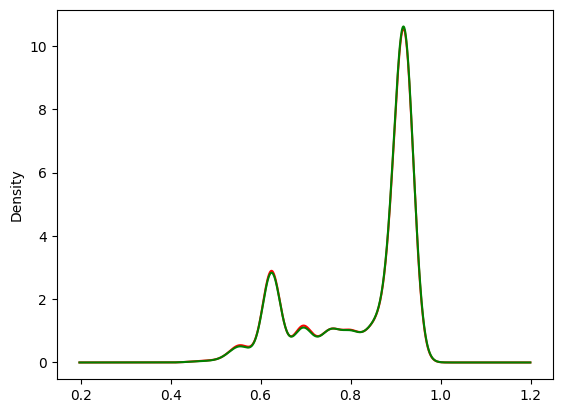

In [19]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original data
df['city_development_index'].plot.density(color='red')

# data after cca
new_df['city_development_index'].plot.density(color='green')

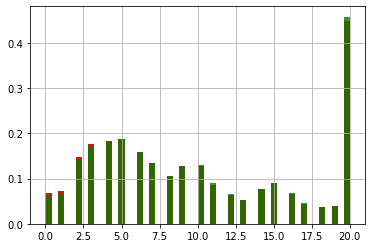

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original data
df['experience'].hist(bins=50, ax=ax, density=True, color='red')

# data after cca, the argument alpha makes the color transparent, so we can
# see the overlay of the 2 distributions
new_df['experience'].hist(bins=50, ax=ax, color='green', density=True, alpha=0.8)

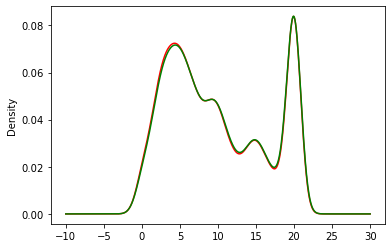

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original data
df['experience'].plot.density(color='red')

# data after cca
new_df['experience'].plot.density(color='green')

Categorical values

In [21]:
df['enrolled_university'].value_counts()

no_enrollment       7565
Full time course    2095
Part time course     647
Name: enrolled_university, dtype: int64

Ratio between above 3 should be maintained after CCA

In [22]:
temp = pd.concat([
            # percentage of observations per category, original data
            df['enrolled_university'].value_counts() / len(df),

            # percentage of observations per category, cca data
            new_df['enrolled_university'].value_counts() / len(new_df)
        ],
        axis=1)

# add column names
temp.columns = ['original', 'cca']

temp

,original,cca
no_enrollment,0.719380,0.732930
Full time course,0.199220,0.203993
Part time course,0.061525,0.063077


Just a minor change for enrolled_university

In [ ]:
temp = pd.concat([
            # percentage of observations per category, original data
            df['education_level'].value_counts() / len(df),

            # percentage of observations per category, cca data
            new_df['education_level'].value_counts() / len(new_df)
        ],
        axis=1)

# add column names
temp.columns = ['original', 'cca']

temp

,original,cca
Graduate,0.605387,0.619835
Masters,0.227633,0.234082
High School,0.105282,0.107380
Phd,0.021610,0.022116
Primary School,0.016077,0.016587
